## Meet Dr. Ignaz Semmelweis
<p>
  Dr. Ignaz Semmelweis was a Hungarian physician born in 1818 and active at the Vienna General Hospital. In the early 1840s at the Vienna General Hospital, as many as 10% of the women giving birth died from <em>childbed fever</em>, a deadly disease that affected women who had just given birth. Semmelweis knew the cause of childbed fever: it was the contaminated hands of the doctors delivering the babies. However, they refused to listen to him and <em>wash their hands</em>!
</p>
<p>
  In this notebook, we will reanalyze the data that led Semmelweis to discover the importance of <em>handwashing</em>. Let's start by examining the data that made Semmelweis realize that something was wrong with the procedures at Vienna General Hospital.
</p>

In [1]:
# Import pandas
import pandas as pd

# Load "datasets/yearly_deaths_by_clinic.csv" into a DataFrame
yearly = pd.read_csv("datasets/yearly_deaths_by_clinic.csv")

# View first 5 rows of the DataFrame
yearly.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


## The alarming number of deaths
<p>
  The table above shows the number of women who gave birth at the two clinics at the Vienna General Hospital for the years 1841 to 1846. It's clear that giving birth was very dangerous, with an <em>alarming</em> number of women dying as a result of childbirth, most of them from childbed fever.
</p>
<p>
  To better understand the magnitude of this problem, let's look at the <em>proportion of deaths</em> out of the total number of women who gave birth. Let's focus specifically on the proportion of deaths at Clinic 1.
</p>

In [2]:
# Add column for proportion of deaths per number of births
yearly["proportion_deaths"] = yearly["deaths"] / yearly["births"]

# Extract data for Clinic 1 and Clinic 2
clinic_1 = yearly[yearly["clinic"] == "clinic 1"]
clinic_2 = yearly[yearly["clinic"] == "clinic 2"]

# View data for Clinic 1
clinic_1

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


## Mortalities at the clinics
<p>If we now plot the proportion of deaths at both Clinic 1 and Clinic 2  we'll see a curious pattern…</p>

<AxesSubplot:xlabel='year', ylabel='Proportion deaths'>

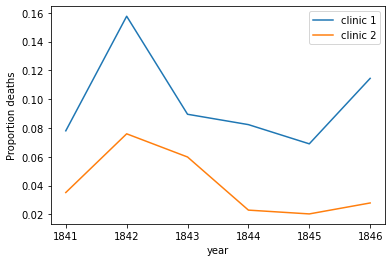

In [3]:
# Import matplotlib
import matplotlib.pyplot as plt

# Make plots appear in the notebook
%matplotlib inline

# Plot yearly proportion of deaths at Clinic 1 and Clinic 2
ax = clinic_1.plot(x="year", y="proportion_deaths", label="clinic 1")
clinic_2.plot(x="year", y="proportion_deaths", label="clinic 2", ax=ax, ylabel="Proportion deaths")

## The handwashing starts
<p>
  Why was the proportion of deaths consistently higher in Clinic 1? Semmelweis saw the same pattern and was puzzled and distressed. The only difference between the clinics was that many medical students served at Clinic 1, while mostly midwife students served at Clinic 2. While the midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses.
</p>
<p>
  Semmelweis suspected that something on the corpses was spreading from the hands of the medical students and causing childbed fever. In an attempt to stop the high mortality rates, he ordered the staff at Clinic 1 to <em>wash their hands</em>. This was an unorthodox and controversial request, as nobody in Vienna knew about bacteria at this time.
</p>
<p>
  Let's load in the monthly data from Clinic 1 to see if the handwashing had any effect.
</p>

In [4]:
# Load "datasets/monthly_deaths.csv" into a DataFrame, parsing the "date" column as dates
monthly = pd.read_csv("datasets/monthly_deaths.csv", parse_dates=["date"])

# Add column for proportion of deaths per number of births
monthly["proportion_deaths"] = monthly["deaths"] / monthly["births"]

# View first 5 rows of the DataFrame
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


## Impact of handwashing on mortality rates
<p>
  Now that we have the data loaded, we can look at the proportion of deaths over time. In the plot below, we haven't marked when the obligation to wash hands began, but it reduced the proportion of deaths so significantly that you should be able to spot it!
</p>

<AxesSubplot:xlabel='date', ylabel='Proportion deaths'>

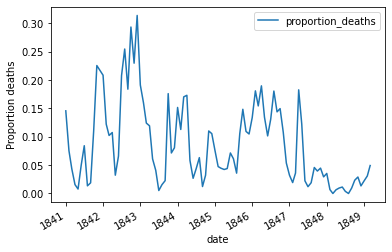

In [5]:
# Plot monthly proportion of deaths
monthly.plot(x="date", y="proportion_deaths", ylabel="Proportion deaths")

## Highlighted effect of handwashing
<p>
  Starting in the summer of 1847, the proportion of deaths is drastically reduced. This was when Semmelweis made handwashing obligatory.
</p>
<p>
  The effectiveness of handwashing becomes even clearer if we highlight it in the graph.
</p>

<AxesSubplot:xlabel='date', ylabel='Proportion deaths'>

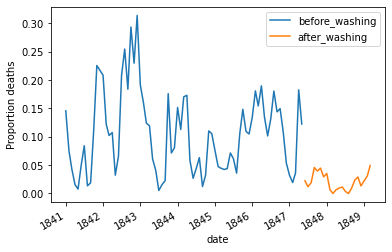

In [6]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly data into before and after handwashing start date
before_washing = monthly[monthly["date"] < handwashing_start]
after_washing = monthly[monthly["date"] >= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing start date
ax = before_washing.plot(x="date", y="proportion_deaths", label="before_washing")
after_washing.plot(x="date", y="proportion_deaths", label="after_washing", ax=ax, ylabel="Proportion deaths")

## Does increased handwashing lead to fewer deaths?
<p>Again, the graph shows that handwashing had a huge effect. How much did it reduce the monthly proportion of deaths on average?</p>

In [7]:
# Calculate mean difference in proportion of deaths before and after handwashing start date
before_proportion = before_washing.proportion_deaths
after_proportion = after_washing.proportion_deaths

mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.0839566075118334

## A Bootstrap analysis of Semmelweis handwashing data
<p>
  Handwashing reduced the proportion of deaths by about 8 percentage points, from an average of 10% to just 2% (which is still a high number by modern standards).
</p>
<p>
  To get a sense of the uncertainty around how much handwashing reduces mortality rates, we can look at a confidence interval (here calculated using the bootstrap method).
</p>

In [8]:
# Perform bootstrapped analysis of difference in mean proportion of deaths before and after handwashing start date
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

# Calculate 95% confidence interval from bootstrapped mean differences
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.100663
0.975   -0.067358
dtype: float64

## Conclusion
<p>
  Based on a 95% confidence interval, handwashing reduced the proportion of deaths by between 6.7 and 10 percentage points. Overall, it appears that Semmelweis had strong evidence that handwashing was a simple but highly effective procedure that could save many lives.
</p>
<p>
  Tragically, despite the evidence, Semmelweis' theory that childbed fever was caused by some "substance" (what we now know as <em>bacteria</em>) from autopsy room corpses was ridiculed by contemporary scientists. The medical community largely rejected his discovery, and in 1849 he was forced to leave the Vienna General Hospital permanently.
</p>
<p>
  One reason for this was that statistics and statistical arguments were uncommon in medical science in the 1800s. Semmelweis only published his data as long tables of raw data, but he didn't show any graphs or confidence intervals. If he had access to the analysis like this one, he might have been more successful in convincing the Viennese doctors to wash their hands.
</p>
